<a href="https://colab.research.google.com/github/JakeOh/202007_iw_pyda_wkd/blob/master/py14_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


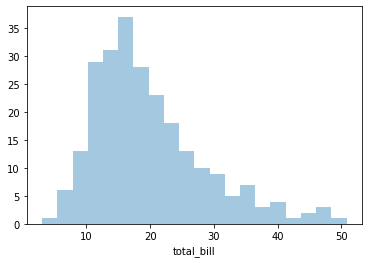

In [6]:
# seaborn 패키지를 사용한 히스토그램
# distribution plot
# bins: 막대 개수, kde: kernel density estimation(밀도 함수)
sns.distplot(tips['total_bill'], kde=False, bins=20)
plt.show()

In [7]:
# 히스토그램: 연속형 변수를 구간을 나눠서 개수 셈.
# 막대그래프: 이산형 변수의 개수를 셈.
size_cnt = tips['size'].value_counts()
size_cnt

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [8]:
size_cnt.index  # pandas.Series의 인덱스

Int64Index([2, 3, 4, 5, 6, 1], dtype='int64')

In [9]:
size_cnt.values  # pandas.Series의 값

array([156,  38,  37,   5,   4,   4])

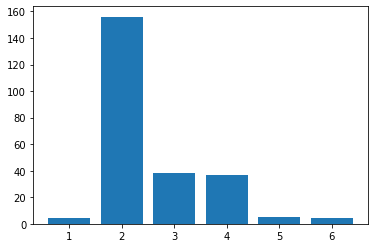

In [11]:
plt.bar(x=size_cnt.index, height=size_cnt.values)
plt.show()

In [12]:
# 손님들의 성비
sex_cnt = tips['sex'].value_counts()
sex_cnt

Male      157
Female     87
Name: sex, dtype: int64

In [13]:
print(sex_cnt.index)
print(sex_cnt.values)

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')
[157  87]


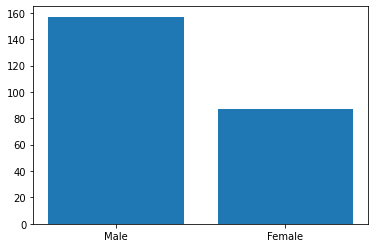

In [14]:
plt.bar(x=sex_cnt.index, height=sex_cnt.values)
plt.show()

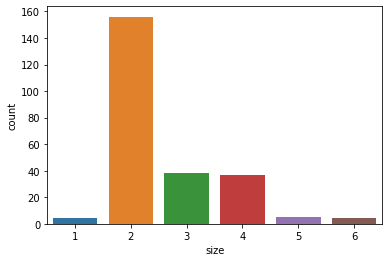

In [15]:
# seaborn 패키지를 사용한 막대그래프
# countplot
sns.countplot(x='size', data=tips)
plt.show()

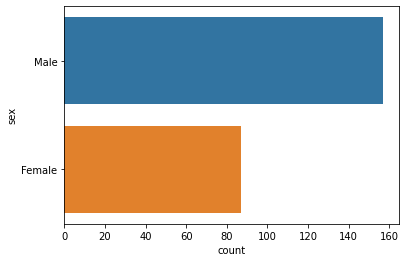

In [17]:
sns.countplot(y='sex', data=tips)
plt.show()

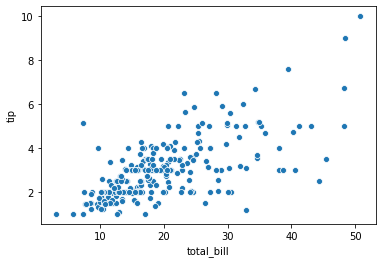

In [18]:
# seaborn 패키지를 사용한 산점도 그래프(scatterplot)
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.show()

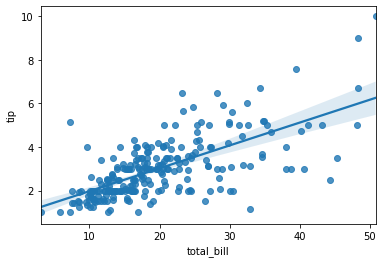

In [19]:
# 회귀 그래프(regression plot): regplot
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

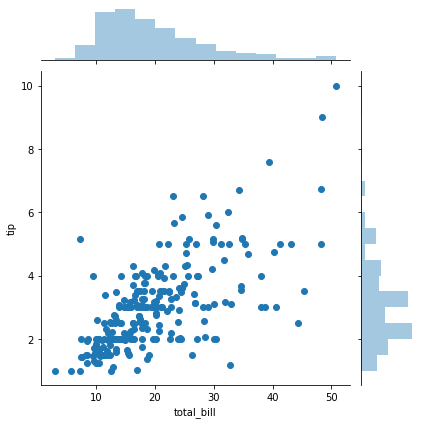

In [20]:
# Joint Plot: 산점도 + 히스토그램
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

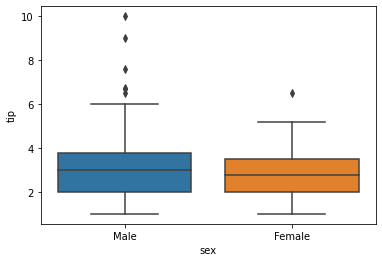

In [21]:
# boxplot - 성별 팁의 요약 통계량
sns.boxplot(x='sex', y='tip', data=tips)
plt.show()

In [22]:
tips.groupby('sex')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


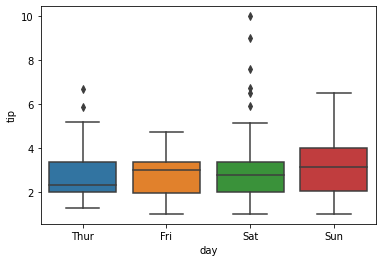

In [24]:
# 요일별 팁의 요약 통계량
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

In [26]:
# 성별 tip의 평균
tip_by_sex = tips.groupby('sex')['tip'].mean()
tip_by_sex

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

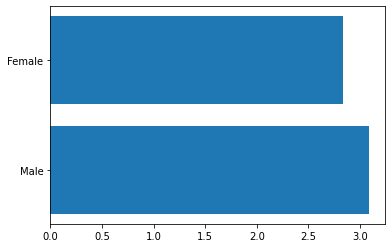

In [27]:
# matplotlib.pyplot 이용
plt.barh(y=tip_by_sex.index, width=tip_by_sex.values)
plt.show()

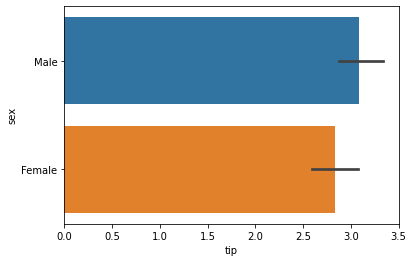

In [28]:
# seaborn 패키지 이용
sns.barplot(x='tip', y='sex', data=tips)
plt.show()

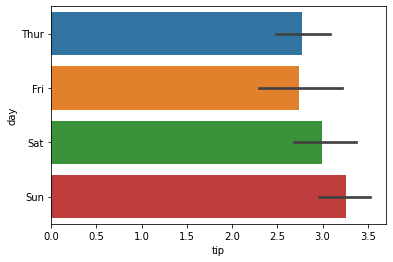

In [29]:
# 요일별 tip의 평균
sns.barplot(x='tip', y='day', data=tips)
plt.show()

In [32]:
# 파생 변수: 데이터 프레임의 컬럼(변수)들을 이용해서 만든
# 새로운 컬럼(변수)
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


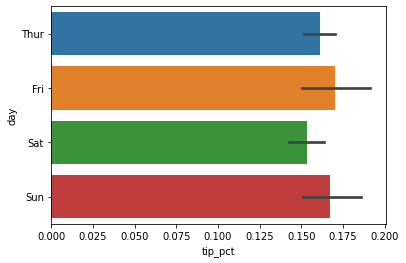

In [33]:
# 요일별 팁 비율의 평균
sns.barplot(x='tip_pct', y='day', data=tips)
plt.show()

In [34]:
# 성별, 요일별 tip의 평균
tips.groupby(['sex', 'day'])['tip'].mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

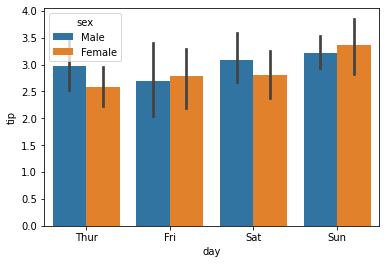

In [35]:
sns.barplot(x='day', y='tip', data=tips, hue='sex')
plt.show()

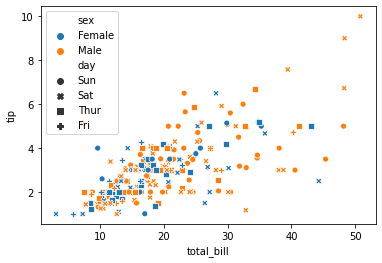

In [37]:
# scatterplot에서 hue
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips,
                style='day')
plt.show()

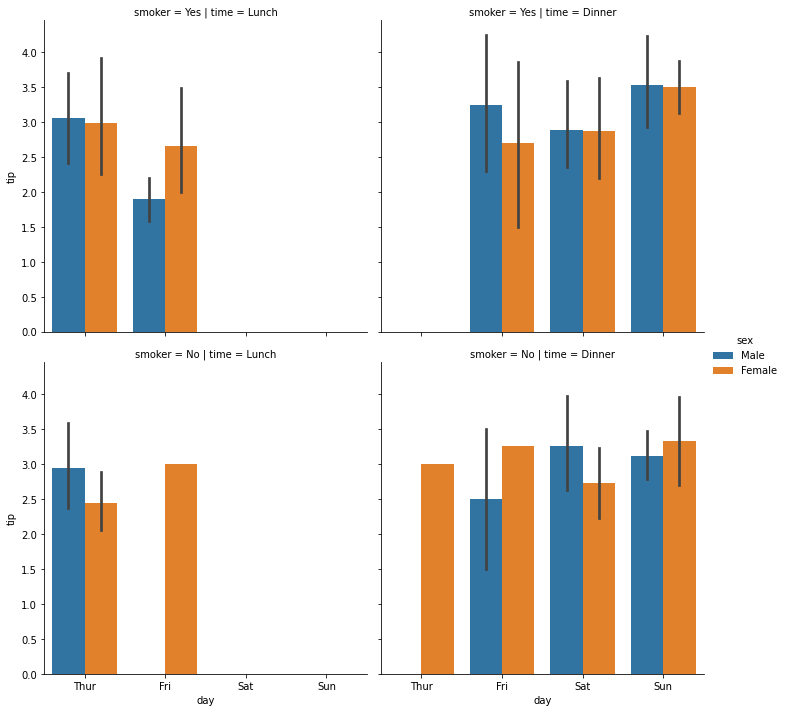

In [38]:
# category plot: 카테고리별로 subplot을 나눠서 그리는 그래프.
sns.catplot(x='day', y='tip', hue='sex', data=tips,
            row='smoker', col='time', kind='bar')
plt.show()